# **Exploration and Classification of wine dataset using GaussianNB, LogisticRegression and RandomForest**

**installing antigranular**

In [ ]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00


**Connecting to the ag server**

In [ ]:
import antigranular as ag
ag_client  = ag.login(<client_id>,<client_secret>, "comp_dataset_id", "temp_username", "temp_password")

Connected to Antigranular server session id: cac0c665-75f8-4a5c-8265-fefa77229e27
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server


**Importing necessary modules and dataset**

In [78]:
%%ag
from op_pandas import PrivateDataFrame , PrivateSeries
from ag_utils import load_dataset, export

response=load_dataset('The Wine Dataset')
train_x= response ['train_x']
train_y= response['train_y']
test_x=response ['test_x']

Dataset "The Wine Dataset" loaded to the kernel as the_wine_dataset
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      



In [79]:
%%ag
#calculating the mean values various column
avg=train_x.mean(eps=0.1)
export(avg,'avg')

Setting up exported variable in local environment: avg


In [80]:
print(avg)

alcohol                          13.319733
malic_acid                        2.559137
ash                               2.343858
alcalinity_of_ash                23.655117
magnesium                       103.405023
total_phenols                     1.955299
flavanoids                        1.990876
nonflavanoid_phenols              0.390196
proanthocyanins                   1.063226
color_intensity                   6.117091
hue                               1.026457
0D280_0D315_of_diluted_wines      2.566055
proline                         958.636962
dtype: float64


In [81]:
%%ag
#calling describe method over training data
priv_describe = train_x.describe(eps=1)
export(priv_describe , 'df_info')

Setting up exported variable in local environment: df_info


In [82]:
print(df_info)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  293.000000  528.000000  197.000000           0.000000  150.000000   
mean    14.056164    3.552091    1.360000          22.603909   93.494771   
std      0.731761    1.810123    0.811390           8.169229   35.195469   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     11.047172    1.490195    2.453191          20.324509   87.972844   
50%     12.850403    3.471884    1.634172          28.553004   91.567352   
75%     14.752717    5.153115    1.362994          29.583054  105.948141   
max     13.560162    2.470111    3.094009          15.480425   79.423196   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       0.000000    0.000000            194.000000       142.000000   
mean        3.546410    5.013798              0.660000         0.410000   
std         0.724618    1.260347              0.216016         1.401058   
min         0.9

In [83]:
%%ag
#joining the training data and training label
train_data = train_x.join(train_y , how="left")
export(train_data.describe(eps=0.5) , 'result')

Setting up exported variable in local environment: result


In [84]:
print(result)

         alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
count   3.000000   84.000000  0.000000         211.000000  284.000000   
mean   14.830000    0.740000  1.618493          30.000000  133.408293   
std     1.458533    1.067196  0.929954           5.770877   31.631120   
min    11.030000    0.740000  1.360000          10.600000   70.000000   
25%    14.821030    3.958995  1.980867          28.539685  124.828244   
50%    12.893098    0.929417  3.158004          27.451866   92.236205   
75%    12.583266    5.093367  1.781700          26.016748   95.414450   
max    11.558248    3.834061  3.183141          28.761080  153.137711   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     124.000000    0.000000            135.000000       147.000000   
mean        2.940776    0.340000              0.660000         0.410000   
std         1.044133    1.730655              0.243139         1.468013   
min         0.980000    0.340000          

In [85]:
%%ag
#removing null values from the training data
export(train_data.dropna(axis=0).describe(eps=1), 'result')

Setting up exported variable in local environment: result


In [86]:
print(result)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  132.000000  144.000000  144.000000         133.000000  246.000000   
mean    13.285976    0.740000    1.441959          19.086401  130.165484   
std      0.717015    1.944922    0.514611           9.572690   21.607285   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     13.552974    1.164231    2.550511          28.518903   90.819155   
50%     13.491007    3.539095    3.215861          24.581322   89.345306   
75%     12.714850    2.949008    2.267493          24.643258   87.600220   
max     14.391054    3.233784    1.481965          24.583492   91.599736   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     292.000000  142.000000            284.000000       169.000000   
mean        0.980000    0.340000              0.130000         0.410000   
std         1.299375    1.818157              0.133008         1.031302   
min         0.9

In [87]:
%%ag
export(train_data.columns, "columns")

Setting up exported variable in local environment: columns


In [88]:
#printing the column names
print(columns)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', '0D280_0D315_of_diluted_wines', 'proline', 'cultivars']


In [89]:
%%ag
#calculating the correlation between the columns
priv_corr = train_x.corr(eps=1)
export(priv_corr , 'priv_corr')

/code/dependencies/op_pandas/op_pandas/utils/stat_utils.py:240: RuntimeWarning: invalid value encountered in sqrt
  ) / np.sqrt(



Setting up exported variable in local environment: priv_corr


<Axes: >

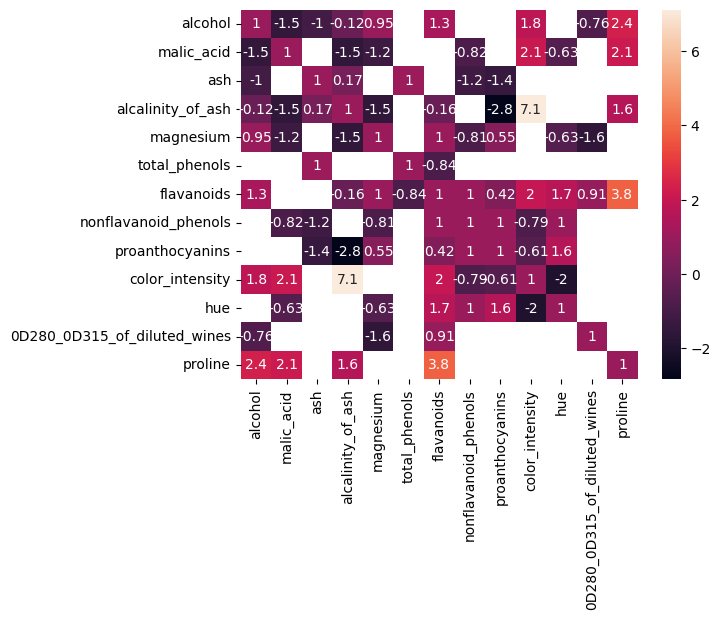

In [90]:
import pandas as pd
import seaborn as sns
result = priv_corr.apply(pd.to_numeric, errors='coerce').astype(float)
sns.heatmap(result , annot = True)

# GaussianNB

In [91]:
%%ag
#using the GaussianNB model to fit the training data
import op_diffprivlib
from op_diffprivlib.models import  LogisticRegression, GaussianNB
bounds = ([11.03,0.74, 1.36, 10.6, 70,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278], [14.83, 5.8, 3.23, 30, 162,3.88,5.08,0.66,3.58,13,1.71,4,1680])
dp_clf2 = GaussianNB(epsilon=5, bounds=bounds, random_state=0)
dp_clf2.fit(train_x, train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [92]:
%%ag
#predicting the output for the test data
out=dp_clf2.predict(test_x)
export(out,'out')

Setting up exported variable in local environment: out


In [93]:
#predicted output
print(out)

[1 2 2 2 2 2 2 3 2 2 2 3 2 2 1 2 2 2 1 2 1 2 1 3 3 3 2 2 2 1 1 2 2 1 2 1]


In [94]:
%%ag
#calculating the accuracy of the model
import pandas as pd
out=pd.DataFrame(out)
submit_predictions(out, "The Wine Dataset")

score: {'leaderboard': 0.9212095566807165, 'logs': {'BIN_ACC': 0.9212095566807165}}



# LogisticRegression

In [95]:
%%ag
#using the LogisticRegression model to fit the training data
from op_diffprivlib.models import  LogisticRegression
clf = LogisticRegression(data_norm=12, epsilon=5).fit(train_x, train_y)


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [96]:
%%ag
#predicting the output for the test data
prediction=clf.predict(test_x)
prediction=pd.DataFrame(prediction)
submit_predictions(prediction)
export(prediction,'predicted_value')

Setting up exported variable in local environment: predicted_value
score: {'leaderboard': 1.0, 'logs': {'BIN_ACC': 1.0}}



In [97]:
#predicted output
print(predicted_value)

    0
0   2
1   1
2   2
3   1
4   2
5   1
6   2
7   2
8   2
9   1
10  1
11  3
12  1
13  3
14  1
15  3
16  3
17  2
18  1
19  3
20  1
21  2
22  2
23  2
24  3
25  2
26  3
27  2
28  2
29  1
30  1
31  3
32  2
33  1
34  1
35  1


# RandomForest

In [103]:
%%ag
#fitting the training data using RandomForestClassifier
from op_diffprivlib.models import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, epsilon = 20 , random_state=0 , bounds=bounds , classes=list(train_x.columns))
model.fit(train_x,train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [104]:
%%ag
#predicting the output for the test data
out = model.predict(test_x)
out=pd.DataFrame(out)
submit_predictions(out)

score: {'leaderboard': 0.0, 'logs': {'BIN_ACC': 0.0}}



In [ ]:
session.privacy_odometer()